#Importing Libraries

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
import re
import warnings
warnings.filterwarnings('ignore')

##Step - 1: Load the dataset and perform basic statistical analysis

In [2]:
#importing the file from google drive
drive.mount('/content/drive', force_remount=True)
path= "/content/drive/My Drive/informatics/Hackathon/football_data.csv"

Mounted at /content/drive


###Use pandas to load the dataset

In [3]:
data=pd.read_csv(path)

###Check the dataset shape and dtypes of each column

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data.shape

(18207, 89)

The datset includes 18207 rows and 89 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

There are 6 columns in dataframe of integer data type 

38 columns belong to float data type

45 columns belong to object data type

##Show the dataset statistical summary

In [8]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [9]:
data.describe(include='O')

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/217650.png,England,https://cdn.sofifa.org/flags/14.png,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/1961.png,€1.1M,€1K,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


Step - 2: Data Viz and Analysis

You can use matplotlib and seaborn for visualization. This is an open ended task. 
For your comfort, below mentioned are the basic visualization you can start with:
Plot histogram of count of players based on some attributes like height.


Use visualization techniques to find outliers like Ronaldo and Messi

Distribution of players in different clubs/countries on the basis of some attributes

And many more….


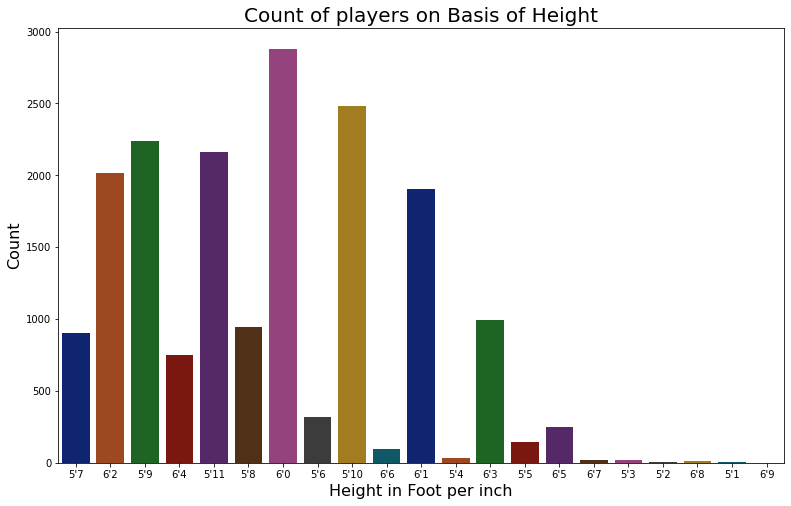

In [10]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

* More than 2500 players are 6'0 feet tall
* 2500 players are 5'10 feet tall
* Less than 100 players are shorter than 6'5 inches tall

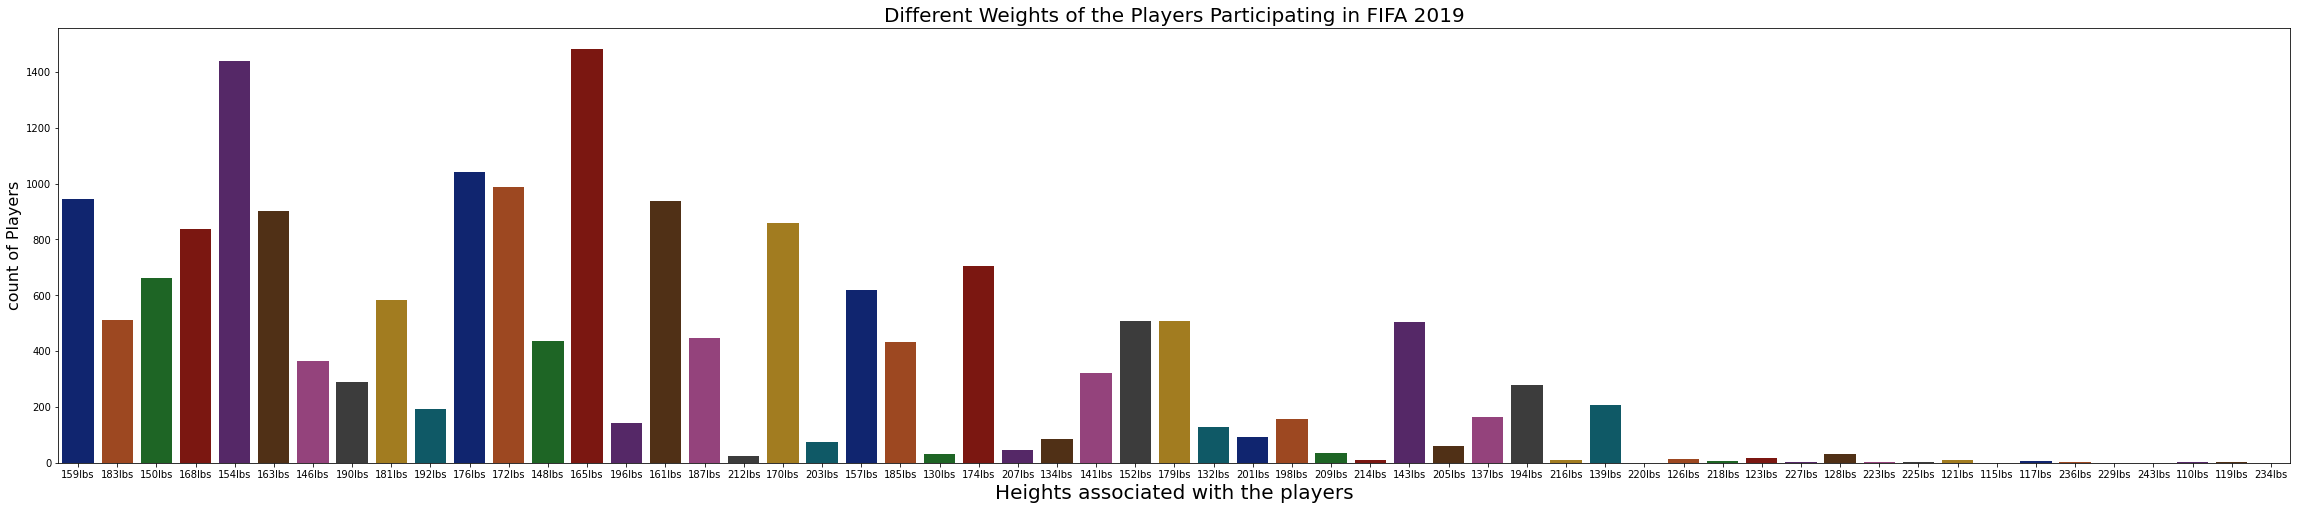

In [11]:
plt.figure(figsize = (40, 8))
sns.countplot(x = 'Weight', data = data, palette = 'dark')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 20)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

* More than 1400 players weigh 1400 lbs
* Around 1400 players weigh 154 lbs
* Less than 200 players weigh more than 190 lbs and less than 135 lbs

#Finding players who have the best ball control and short power

In [12]:
data.sort_values('BallControl', ascending = False)[['BallControl','Name', 'Age', 'Club', 'Nationality']].head(5)

,BallControl,Name,Age,Club,Nationality
0,96.0,L. Messi,31,FC Barcelona,Argentina
2,95.0,Neymar Jr,26,Paris Saint-Germain,Brazil
30,95.0,Isco,26,Real Madrid,Spain
5,94.0,E. Hazard,27,Chelsea,Belgium
1,94.0,Cristiano Ronaldo,33,Juventus,Portugal


In [13]:
data.sort_values('ShotPower', ascending = False)[['ShotPower','Name', 'Age', 'Club', 'Nationality']].head(5)

,ShotPower,Name,Age,Club,Nationality
1,95.0,Cristiano Ronaldo,33,Juventus,Portugal
378,94.0,Hulk,31,Shanghai SIPG FC,Brazil
1348,93.0,F. Guarín,32,Shanghai Greenland Shenhua FC,Colombia
890,92.0,L. Podolski,33,Vissel Kobe,Germany
36,92.0,G. Bale,28,Real Madrid,Wales


### Messi has the best ball control and christiano ronaldo has the best shot power among all the players

#Step - 3: Manipulation of ‘Height’, ‘Weight’, ‘Value’ and ‘Wage’ Columns:

Detecting Null values in 'Wage' , 'Value' , 'Weight' and 'Height' features

In [14]:
null_values=pd.DataFrame()
columns=['Wage','Value','Weight','Height']

for col in columns:
  print('Null values for {}, {}'.format(col,data[col].isnull().sum()))

Null values for Wage, 0
Null values for Value, 0
Null values for Weight, 48
Null values for Height, 48


Wage and Value have 0 null values

weight and height have 48 null values

#Detect and remove inconsistencies from each columns

Transform ‘Height’, ‘Weight’, ‘Value’ and ‘Wage’ Columns to numeric values

In [15]:
data['Wage'].unique()

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

Wage feature has € and K in the values so these 2 characters are removed and all the values are converted from string type to numerical type

In [16]:
data['Wage']=data['Wage'].apply(lambda x:x.lstrip('€').rstrip('K')).astype(int)
data['Wage']=data['Wage']*(1000)

In [17]:
data['Wage'].unique()

array([565000, 405000, 290000, 260000, 355000, 340000, 420000, 455000,
       380000,  94000, 205000, 125000, 285000, 225000, 145000, 240000,
       315000, 200000, 130000, 300000, 215000, 100000, 255000, 165000,
       265000, 160000, 150000, 245000, 110000,  77000, 115000, 210000,
       195000, 230000, 250000, 135000, 155000, 180000, 175000, 190000,
       185000,  21000,  82000,  73000,  92000,  88000,  96000, 170000,
        66000, 235000,  28000, 105000,  38000,  81000,  57000,  15000,
        63000,  22000,  84000, 120000,  90000,  72000,  93000,  45000,
        74000,  51000,  42000,  31000,  75000,  25000, 140000,  41000,
        78000,  53000,  95000,  80000,  43000,  60000,  85000,  64000,
        67000,  18000,  70000,  91000,  20000,  49000,  87000,  86000,
        26000,  29000,  55000,  35000,  33000,  56000,  30000,  11000,
        59000,  23000,  46000,  39000,  32000,  36000,  98000,  54000,
        68000,  58000,  27000,  40000,  44000,  19000,   1000,  61000,
      

In [18]:
data['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

Wage feature has €,K and M in the values so € character is removed and K, M  characters are replaced by 10^3 and 10^6 and convert from string type to numerical type 

In [19]:
data['Value'] = data['Value'].apply(lambda x:x.lstrip('€'))
data['Value']=data['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
data['Value'].unique()

array([110500000,  77000000, 118500000,  72000000, 102000000,  93000000,
        67000000,  80000000,  51000000,  68000000,  76500000,  44000000,
        60000000,  63000000,  89000000,  83500000,  78000000,  58000000,
        53500000,  51500000,  38000000,  64500000,  27000000,  81000000,
        69500000,  59500000,  62000000,  73500000,  59000000,  46000000,
        43000000,  36000000,  57000000,  24000000,  30000000,   4000000,
        64000000,  30500000,  62500000,  52000000,  45000000,  34000000,
        46500000,  61000000,  41500000,  44500000,  56500000,  53000000,
        50000000,  55000000,  36500000,  45500000,  43500000,  35000000,
        39000000,  18000000,  21500000,  50500000,  54000000,  40500000,
        37500000,  28500000,  37000000,  32000000,  26000000,  33000000,
        38500000,  35500000,   9000000,  15500000,  22000000,  14000000,
        42500000,  31500000,  42000000,  25000000,  29500000,  31000000,
        24500000,  27500000,  29000000,  16500000, 

In [20]:
data['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs', nan,
       '110lbs', '119lbs', '234lbs'], dtype=object)

'lbs' characters are removed from the weight feature and convert into numerical data type

In [21]:
data['Weight']=data['Weight'].str.extract(r'(\d+)').astype(float)
data['Weight'].unique()

array([159., 183., 150., 168., 154., 163., 146., 190., 181., 192., 176.,
       172., 148., 165., 196., 161., 187., 212., 170., 203., 157., 185.,
       130., 174., 207., 134., 141., 152., 179., 132., 201., 198., 209.,
       214., 143., 205., 137., 194., 216., 139., 220., 126., 218., 123.,
       227., 128., 223., 225., 121., 115., 117., 236., 229., 243.,  nan,
       110., 119., 234.])

In [22]:
data['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

Height feature is converted from feets and inches to cm

In [23]:
def convert_to_cm(ht):
  try:
    ht=ht.split("'")
    ft=float(ht[0])
    inch=float(ht[1])
    return (ft*12+inch)
  except:
    return np.NaN
data['Height']=data['Height'].apply(lambda x: convert_to_cm(x))

In [24]:
#filling the missing values with mean 
data['Weight'].fillna(data['Weight'].mean(),inplace=True)
data['Height'].fillna(data['Height'].mean(),inplace=True)

In [31]:
data['bmi']=703*data['Height']/data['Weight']

In [32]:
data['bmi']

0        296.232704
1        284.273224
2        323.380000
3        318.023810
4        324.110390
            ...    
18202    361.992537
18203    310.147059
18204    323.000000
18205    319.545455
18206    279.602273
Name: bmi, Length: 18207, dtype: float64

In [25]:
null_values=pd.DataFrame()
columns=['Wage','Value','Weight','Height']

for col in columns:
  print('Null values for {}, {}'.format(col,data[col].isnull().sum()))

Null values for Wage, 0
Null values for Value, 0
Null values for Weight, 0
Null values for Height, 0



#Plot histogram and kde plots on attributes like ‘Value’ and ‘Wage’

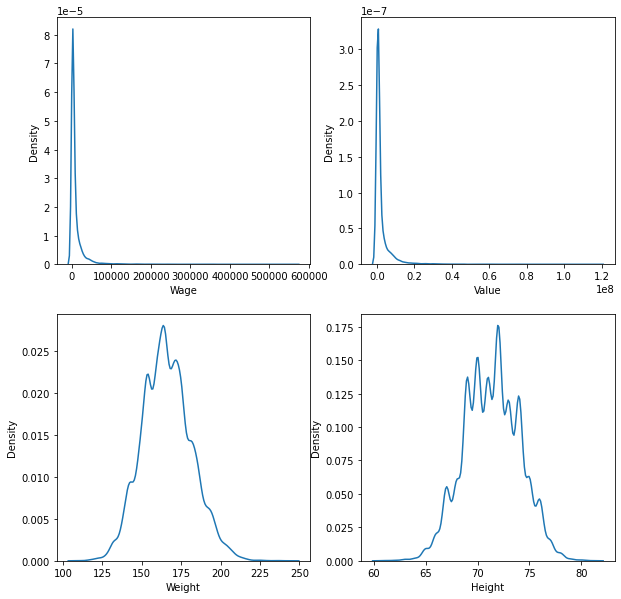

In [26]:
plt.figure(figsize=(10,10))
for i,col in enumerate(columns):
  plt.subplot(2,2,i+1)
  sns.kdeplot(data=data,x=data[col])

Wage and value features are not following normal distribution 

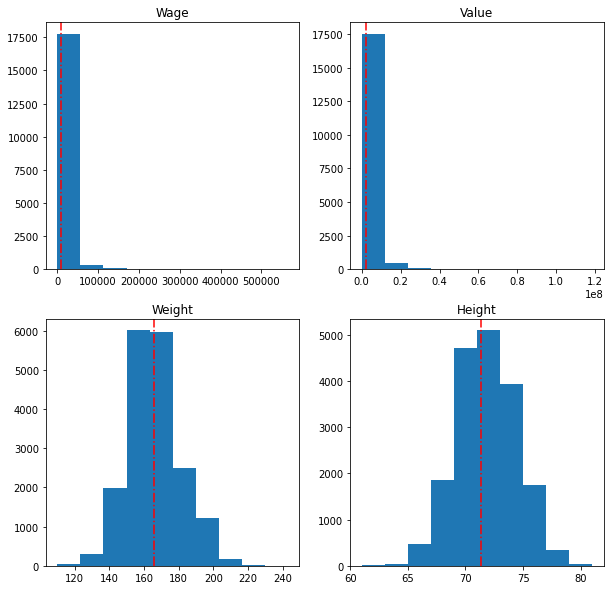

In [27]:
plt.figure(figsize=(10,10))
for i,col in enumerate(columns):
  plt.subplot(2,2,i+1)
  plt.axvline(x= data[col].mean(),c='red',ls='-.',label='Mean')
  plt.hist(data[col])
  plt.title(col)

Plots for both weight and height features looks normally distributed

the average height of players is around 72 cm and weight is around 164 lbs

Plot histogram of count of players based on some attributes like height.

In [28]:
data.sort_values('Strength', ascending = False)[['Strength','Name', 'Age', 'Club', 'Nationality']].head(5)

,Strength,Name,Age,Club,Nationality
9501,97.0,A. Akinfenwa,36,Wycombe Wanderers,England
1124,95.0,Wesley,21,Club Brugge KV,Brazil
2559,95.0,K. Waston,30,Vancouver Whitecaps FC,Costa Rica
14111,95.0,T. Chorý,23,Viktoria Plzeň,Czech Republic
15179,94.0,M. Rhead,34,Lincoln City,England


* A. Akinfenwa is the strongest player

* Wesley, K.Watson T Chory are among the top 4 strongest players

In [29]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

#Conclusion

###The datset includes 18207 rows and 89 columns
###There are 6 columns in dataframe of integer data type
###More than 1400 players weigh 1400 lbs
###Around 1400 players weigh 154 lbs
###Less than 200 players weigh more than 190 lbs and less than 135 lbs
###More than 2500 players are 6'0 feet tall 2500 players are 5'10 feet tall.
###Less than 100 players are shorter than 6'5 inches tall

###Messi has the best ball control and christiano ronaldo has the best shot power among all the players

###A. Akinfenwa is the strongest player

###Wesley, K.Watson T Chory are among the top 4 strongest players

###Plots for both weight and height features looks normally distributed

###the average height of players is around 72 cm and weight is around 164 lbs

###Plot histogram of count of players based on some attributes like height.

###Wage and value features are not following normal distribution
